In [6]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [7]:
data=pd.read_csv('/Users/nafeesahussain/Desktop/FlipRobo_Internship/glass.csv')
data.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [9]:
data.describe().style.background_gradient(cmap='ocean_r')

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
#finding correlation
corr=data.corr().style.background_gradient(cmap='winter')
corr

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
1,1.000000,-0.065721,0.380767,-0.647082,0.488475,0.052634,-0.002306,0.090257,0.451437,-0.078151,0.878113
1.52101,-0.065721,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
13.64,0.380767,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
4.49,-0.647082,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
1.10,0.488475,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
71.78,0.052634,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
0.06,-0.002306,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
8.75,0.090257,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
0.00,0.451437,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
0.00.1,-0.078151,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090


<Axes: >

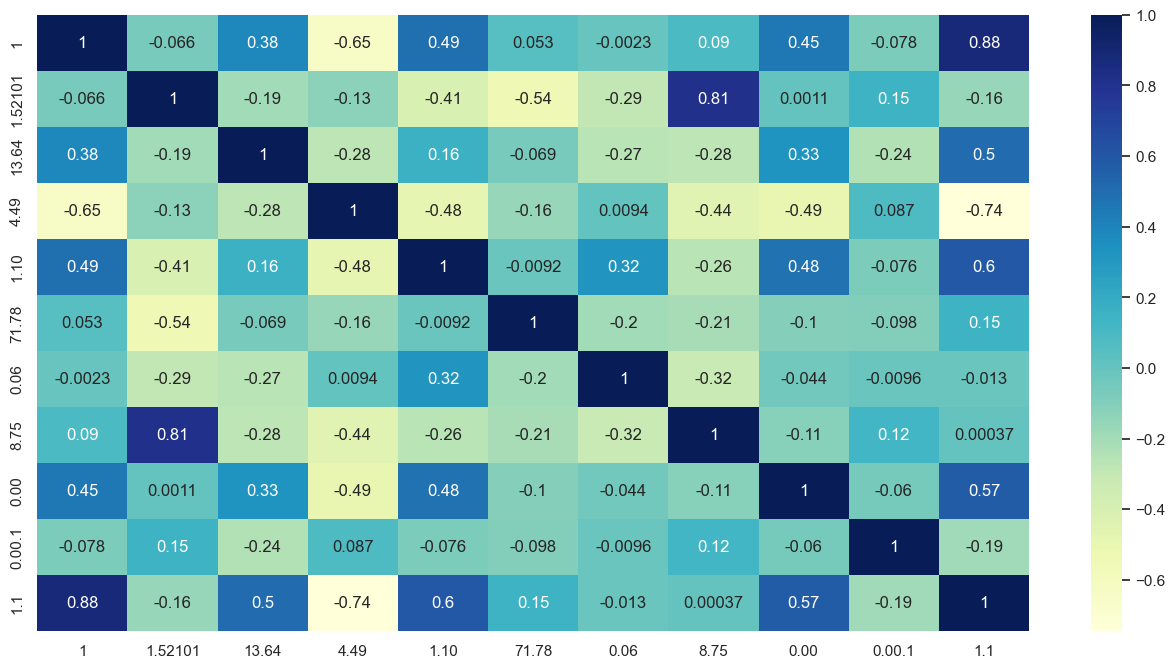

In [11]:
#visualising heatmap
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

In [ ]:
type_glass=data['Type of glass'].value_counts()
plt.figure(figsize=(16,10))
plt.pie(type_glass,labels=['2','1','7','3','5','6'],colors=['red','pink','green','yellow','blue','orange'], autopct='%1.1f%%',)
plt.title("To visualize the type_of_glass in the dataset",fontsize=32)
plt.show()

In [ ]:
data.rename(columns={'Type of glass':'type_of_glass'},inplace=True)

In [ ]:
data.columns

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(data['Mg'],palette='rainbow')

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
sns.histplot(data['Si'],palette='rainbow',kde=True)

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
sns.histplot(data['Al'],palette='rainbow',kde=True)

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
sns.kdeplot(data['Na'],palette='rainbow')

In [ ]:
#Modeling
X=data.drop(['type_of_glass'],axis=1)
y=data['type_of_glass']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
logistic=LogisticRegression()
#fit the train dataset
logistic.fit(X_train,y_train)
#prediction
logistic_pred=logistic.predict(X_test)

In [ ]:
print(f'the accuracy_score is {logistic.score(X_test,y_test)*100:.2f}')
print(f'the accuracy_score is {logistic.score(X_train,y_train)*100:.2f}')
print(f'the accuracy_score is {accuracy_score(y_test,logistic_pred)*100:.2f}')

In [ ]:
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='autumn',xticklabels=['2','1','7','3','5','6'],yticklabels=['2','1','7','3','5','6'])

In [ ]:
#install the tree model
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
#prediction
tree_pred=tree.predict(X_test)

In [ ]:
print(f'The accuracy_score is {tree.score(X_test,y_test)*100:.2f}')
print(f'The accuracy_score is {tree.score(X_train,y_train)*100:.2f}')
print(f'The accuracy_score is {accuracy_score(y_test,tree_pred)*100:.2f}')

In [ ]:
print(classification_report(y_test,tree_pred))
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='ocean_r',xticklabels=['2','1','7','3','5','6'],yticklabels=['2','1','7','3','5','6'])

In [ ]:
#install the randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
#install the classifier
random=RandomForestClassifier()
#fit the train dataset
random.fit(X_train,y_train)
#prediction
random_pred=random.predict(X_test)

In [ ]:
print(f'The accuracy_score is {random.score(X_test,y_test)*100:.2f}')
print(f'The accuracy_score is {random.score(X_train,y_train)*100:.2f}')
print(f'The accuracy_score is {accuracy_score(y_test,random_pred)*100:.2f}')

In [ ]:
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='winter',xticklabels=['2','1','7','3','5','6'],yticklabels=['2','1','7','3','5','6'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Install the KNeighborsClassifier
knn = KNeighborsClassifier()
#And the fit the training dataset
knn.fit(X_train, y_train)
#prediction
knn_pred=knn.predict(X_test)

In [ ]:
print(f'The KNeighborsClassifier model test score is {knn.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The KNeighborsClassifier model train scores is {knn.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The KNeighborsClassifier accuracy_score {accuracy_score(y_test,knn_pred)*100:.2f}')

In [ ]:
print(classification_report(y_test,knn_pred))
#confusion_matrix
cn=confusion_matrix(y_test,knn_pred)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cn,annot=True,cmap='tab20b_r',xticklabels=['2','1','7','3','5','6'],yticklabels=['2','1','7','3','5','6'])